In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
df_final = pd.read_csv('data_new/stocks.csv').drop(['Unnamed: 0'], axis=1)
df_final

Date        AAPL        GOOG        META        MSFT
0      1980-12-12    0.128348         NaN         NaN         NaN
1      1980-12-15    0.121652         NaN         NaN         NaN
2      1980-12-16    0.112723         NaN         NaN         NaN
3      1980-12-17    0.115513         NaN         NaN         NaN
4      1980-12-18    0.118862         NaN         NaN         NaN
...           ...         ...         ...         ...         ...
10833  2023-12-01  191.240005  133.320007  324.820007  374.510010
10834  2023-12-04  189.429993  130.630005  320.019989  369.140015
10835  2023-12-05  193.419998  132.389999  318.290009  372.519989
10836  2023-12-06  192.320007  131.429993  317.450012  368.799988
10837  2023-12-07  194.270004  138.449997  326.589996  370.950012

[10838 rows x 5 columns]

In [8]:
px.line(df_final,
        x = 'Date',
        y = ['AAPL', 'GOOG', 'META', 'MSFT'],
        labels = {'variable': "Stocks",
                 'value': ""},
        title = "Closing price"
)

<Axes: >

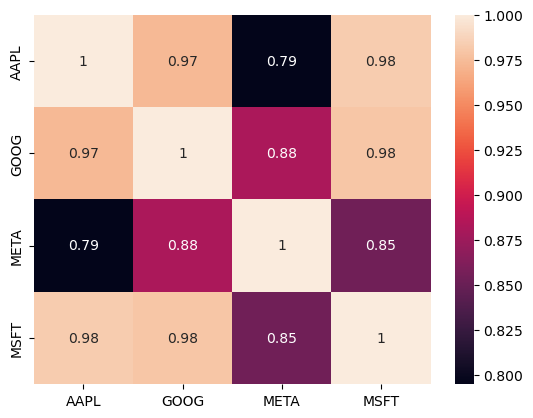

In [9]:
df_corr = df_final.select_dtypes(include = np.number)
sns.heatmap(df_corr.corr(), annot = True)

<Axes: >

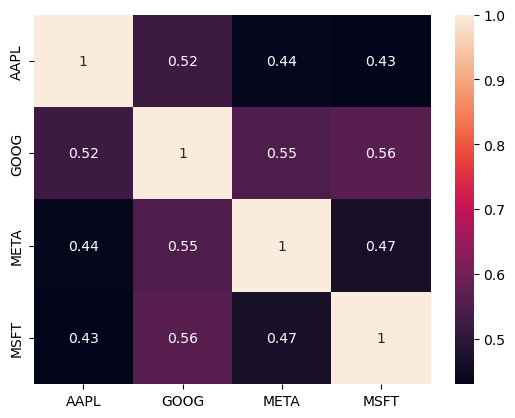

In [11]:
df_pc = df_final.set_index('Date').pct_change().reset_index()
df_pc = df_pc.select_dtypes(include = np.number)
sns.heatmap(df_pc.corr(), annot = True)

# df_pc from wide to long

In [15]:
df_pc = df_final.set_index('Date').pct_change().reset_index().dropna()
df_pc

df_pc_long = pd.melt(
    df_pc,
    id_vars = "Date",
    var_name = "stock",
    value_name = "value"
)

px.line(df_pc_long,
        x = "Date",
        y = 'value',
        color = 'stock')

In [16]:
px.histogram(df_pc.select_dtypes(include = np.number))

In [19]:
df_cumulative_returns = df_pc.set_index('Date').apply(lambda x: (1 + x).cumprod() - 1).reset_index()
df_cumulative_returns

Date      AAPL      GOOG      META       MSFT
0     2012-05-21  0.058260  0.022835 -0.109861   0.016399
1     2012-05-22  0.050134  0.000666 -0.189118   0.016741
2     2012-05-23  0.075757  0.015090 -0.162961  -0.005466
3     2012-05-24  0.065877  0.005430 -0.136019  -0.006833
4     2012-05-25  0.060164 -0.014773 -0.165315  -0.007175
...          ...       ...       ...       ...        ...
2902  2023-12-01  9.096007  7.915371  7.496469  11.795012
2903  2023-12-04  9.000453  7.735486  7.370913  11.611548
2904  2023-12-05  9.211094  7.853180  7.325661  11.727024
2905  2023-12-06  9.153023  7.788982  7.303689  11.599931
2906  2023-12-07  9.255968  8.258424  7.542767  11.673386

[2907 rows x 5 columns]

In [20]:
px.line(df_cumulative_returns,
       x = "Date",
       y = ['AAPL', 'GOOG', 'META', 'MSFT'],
       labels = {'value': 'Cumulative returns',
                 'variable': 'Stock'},
        title = 'Cumulative returns')